In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic.info()
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
titanic['Age'] = titanic['Age'].ffill()
titanic['Age'] = titanic['Age'].bfill()
titanic['Age'].isnull().sum()

0

In [19]:
titanic['Cabin']=titanic['Cabin'].fillna('unknown')
print(titanic['Cabin'])

0      unknown
1      unknown
2      unknown
3      unknown
4      unknown
        ...   
413    unknown
414       C105
415    unknown
416    unknown
417    unknown
Name: Cabin, Length: 418, dtype: object


In [21]:
print(f"Duplicates before removal: {titanic.duplicated().sum()}")
titanic.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {titanic.duplicated().sum()}")

Duplicates before removal: 0
Duplicates after removal: 0


In [25]:
le = LabelEncoder()
titanic['Sex_encoded'] = le.fit_transform(titanic['Sex'])
titanic[['Sex', 'Sex_encoded']].head()

,Sex,Sex_encoded
0,male,1
1,female,0
2,male,1
3,male,1
4,female,0


In [27]:
scaler = StandardScaler()
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
titanic['Fare_scaled'] = scaler.fit_transform(titanic[['Fare']])
titanic[['Fare', 'Fare_scaled']].head()


,Fare,Fare_scaled
0,7.8292,-0.497413
1,7.0000,-0.512278
2,9.6875,-0.464100
3,8.6625,-0.482475
4,12.2875,-0.417492


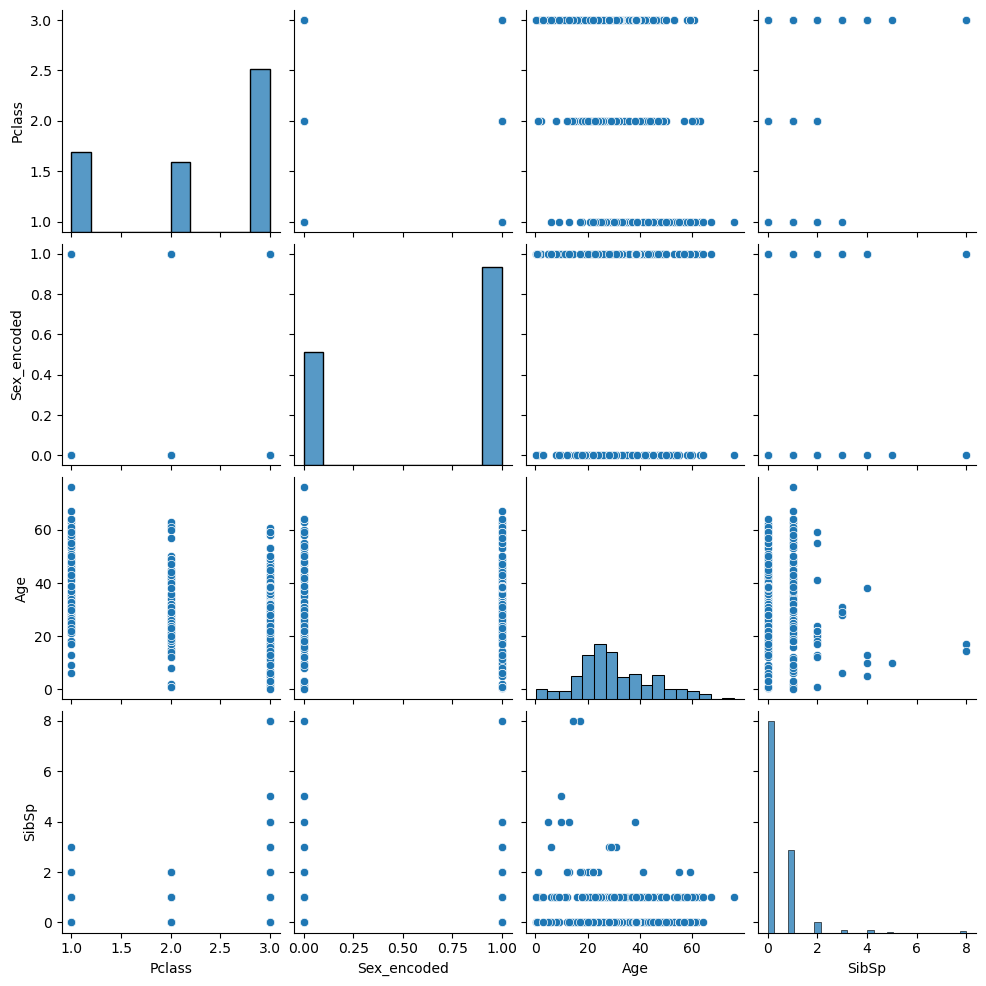

In [29]:
sns.pairplot(titanic[['Pclass', 'Sex_encoded', 'Age', 'SibSp']])
plt.show()


In [31]:
corr_features = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
corr = corr_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()